<a href="https://colab.research.google.com/github/chien2734/sgu_data_analyst/blob/main/Group/Lab2_DataAnalytics/DataAnalyst/13_4_and_13_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Data Analysis Example**

## 4. USDA Food Database

### Thông tin về dữ liệu
* USDA Food Database là cơ sở dữ liệu về thông tin dinh dưỡng của thực phẩm do Bộ Nông nghiệp Hoa Kỳ (USDA) cung cấp.
* Cơ sở dữ liệu này chứa thông tin chi tiết về các loại thực phẩm, bao gồm:
  * lượng calo
  * protein
  * chất béo
  * carbohydrate
  * vitamin
  * khoáng chất và các thành phần dinh dưỡng khác.

### Cấu trúc dữ liệu của một món ăn
Mỗi thực phẩm trong cơ sở dữ liệu là một **dictionary** chứa nhiều thông tin mô tả:

In [1]:
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
    "amount": 1,
    "unit": "wing, with skin",
    "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
    "value": 20.8,
    "units": "g",
    "description": "Protein",
    "group": "Composition"
    },
    ...
  ]
}

{'id': 21441,
 'description': 'KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading',
 'tags': ['KFC'],
 'manufacturer': 'Kentucky Fried Chicken',
 'group': 'Fast Foods',
 'portions': [{'amount': 1, 'unit': 'wing, with skin', 'grams': 68.0},
  Ellipsis],
 'nutrients': [{'value': 20.8,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  Ellipsis]}

Trong đó:

* **portions** mô tả các khẩu phần ăn (ví dụ: “1 cánh gà”, “100g”).

* **nutrients** là danh sách các chất dinh dưỡng có trong món ăn đó

### Nạp dữ liệu
Lập trình viên Ashley Williams đã tạo ra một phiên bản JSON của cơ sở dữ liệu này, giúp chúng ta dễ dàng thao tác bằng Python.

In [2]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

Bộ dữ liệu gồm 6636 loại thực phẩm


### Xem cấu trúc của một món ăn


In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

Đây là các thông tin về một loại thực phẩm

In [4]:
print(db[3]["description"])
db[3]["nutrients"][0]

Cheese, feta


{'value': 5.2, 'units': 'g', 'description': 'Ash', 'group': 'Other'}

Đây là một trong các chất dinh dưỡng có trong Cheese, feta

Chuyển danh sách thành DataFrame để dễ quan sát


In [5]:
import pandas as pd
nutrients = pd.DataFrame(db[3]["nutrients"])
print(db[3]["description"])
nutrients.head(10)

Cheese, feta


,value,units,description,group
0,5.20,g,Ash,Other
1,14.21,g,Protein,Composition
2,21.28,g,Total lipid (fat),Composition
3,4.09,g,"Carbohydrate, by difference",Composition
4,5.20,g,Ash,Other
5,264.00,kcal,Energy,Energy
6,0.00,g,"Alcohol, ethyl",Other
7,55.22,g,Water,Composition
8,0.00,mg,Caffeine,Other
9,0.00,mg,Theobromine,Other


**Nhận xét:**
* Feta là loại phô mai giàu protein và chất béo, nhưng ít carbohydrate, nhiều nước và cung cấp mức năng lượng vừa phải.

* Nhờ có hàm lượng khoáng cao, feta là nguồn cung cấp canxi và muối tốt, tuy nhiên người ăn kiêng muối nên chú ý.

* Thành phần dinh dưỡng này cho thấy feta phù hợp với chế độ ăn giàu đạm, ít carb, nhưng nên dùng với lượng vừa phải để tránh dư thừa chất béo bão hòa và natri.

### Tạo DataFrame chứa thông tin cơ bản của thực phẩm
Ta chỉ lấy các trường chính như **tên món**, **nhóm**, **id**, **nhà sản xuất**:

In [6]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [7]:
info.info()
null_values = info["manufacturer"].isnull().sum()

print("Tỷ lệ giá trị null trong cột manufacturer:", (null_values/6636)*100, "%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB
Tỷ lệ giá trị null trong cột manufacturer: 21.714888487040383 %


Kết quả cho thấy có sự **missing value** ở cột **nhà sản xuất (manufacturer)**


### Phân tích nhanh - nhóm thực phẩm phổ biến

/tmp/ipython-input-2615718256.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  group_counts = pd.value_counts(info["group"])[:10]


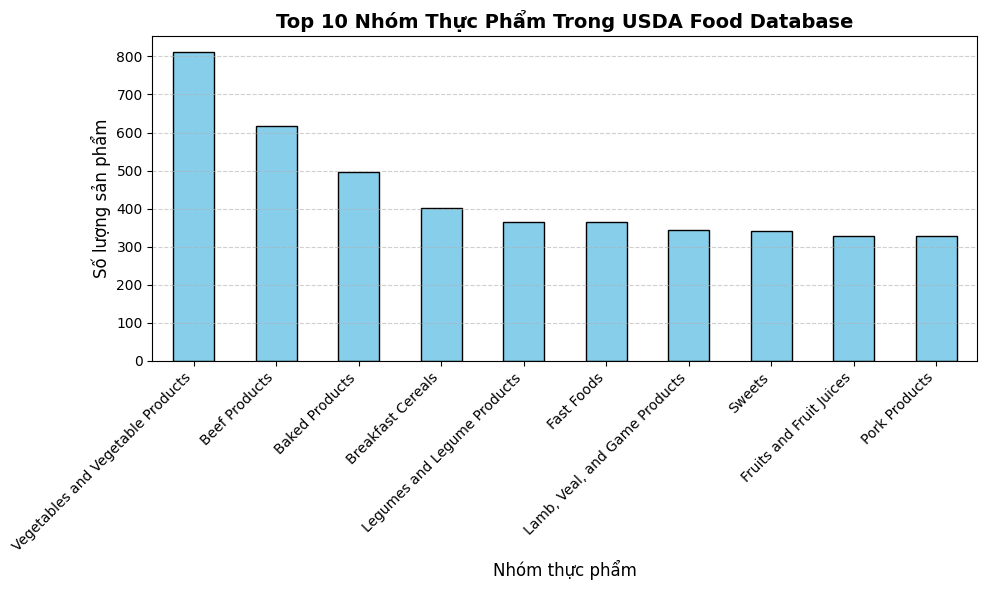

In [8]:
import matplotlib.pyplot as plt
group_counts = pd.value_counts(info["group"])[:10]

plt.figure(figsize=(10,6))
group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Nhóm Thực Phẩm Trong USDA Food Database", fontsize=14, weight='bold')
plt.xlabel("Nhóm thực phẩm", fontsize=12)
plt.ylabel("Số lượng sản phẩm", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('top_10_groups.png', dpi=300, bbox_inches='tight')
plt.show()


\--> **Rau củ** là nhóm được mô tả nhiều nhất trong cơ sở dữ liệu **USDA**. Tiếp theo là thịt bò và sản phẩm nướng.

### Gộp dữ liệu dinh dưỡng của tất cả món ăn
* Mục tiêu: tạo một bảng lớn, nơi mỗi dòng là 1 chất dinh dưỡng của 1 món ăn.
* Ta duyệt qua từng món ăn, biến rec["nutrients"] thành DataFrame, thêm id, rồi nối lại:

In [9]:
nutrients = []
for rec in db:
  fnuts = pd.DataFrame(rec["nutrients"])
  fnuts["id"] = rec["id"]
  nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Sau khi ghép, bảng có 389.355 dòng, mỗi dòng thể hiện một chất dinh dưỡng cụ thể.

### Làm sạch và chuẩn hóa dữ liệu

In [10]:
# Kiểm tra số dòng trùng lặp
duplicate = nutrients.duplicated().sum()
print("Số dữ liệu trùng lặp gồm " + str(duplicate) + " dòng. Chiếm ",(duplicate/389355)*100, "%")

# Kiểm tra dữ liệu bị thiếu (null)
null_values = nutrients.isnull().sum()
print("\nSố lượng giá trị null trong từng cột:")
print(null_values)

# Kiểm tra tổng số dòng có ít nhất một giá trị null
total_null_rows = nutrients.isnull().any(axis=1).sum()
print("\nTổng số dòng có ít nhất một giá trị null:", total_null_rows)


Số dữ liệu trùng lặp gồm 14179 dòng. Chiếm  3.6416637772726688 %

Số lượng giá trị null trong từng cột:
value          0
units          0
description    0
group          0
id             0
dtype: int64

Tổng số dòng có ít nhất một giá trị null: 0


In [11]:
nutrients = nutrients.drop_duplicates()
print("Dữ liệu sau khi xóa các dòng bị trùng:")
nutrients

Dữ liệu sau khi xóa các dòng bị trùng:


,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Nhận xét:
* Có 14179 dòng dữ liệu bị trùng lặp
* Sau khi loại bỏ các hàng trùng lặp, dữ liệu còn 375176 dòng

In [12]:
print("Các cột trong DataFrame info:")
print(info.columns)
print("Các cột trong DataFrame nutrients:")
print(nutrients.columns)

Các cột trong DataFrame info:
Index(['description', 'group', 'id', 'manufacturer'], dtype='object')
Các cột trong DataFrame nutrients:
Index(['value', 'units', 'description', 'group', 'id'], dtype='object')


Vì **"group"** và **"description"** đều nằm trong cả hai đối tượng DataFrame, chúng ta có thể đổi tên cho rõ ràng hơn:

In [13]:
col_mapping = {"description" : "food", "group" : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
print("Các cột trong DataFrame info sau khi đổi tên:")
info.columns

Các cột trong DataFrame info sau khi đổi tên:


Index(['food', 'fgroup', 'id', 'manufacturer'], dtype='object')

* Cột "description" sẽ được đổi tên thành "food".

* Cột "group" sẽ được đổi tên thành "fgroup".

In [14]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
print("Các cột trong DataFrame nutrients sau khi đổi tên:")
nutrients.columns

Các cột trong DataFrame nutrients sau khi đổi tên:


Index(['value', 'units', 'nutrient', 'nutgroup', 'id'], dtype='object')

Cột **'nutrient'** biểu thị tên chất (vd: Protein), **'nutgroup'** là nhóm chất (vd: Composition).

In [15]:
ndata = pd.merge(nutrients, info, on="id")
print("Kết quả sau khi gộp hai bảng:")
print(ndata.info())
ndata.head()

Kết quả sau khi gộp hai bảng:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB
None


,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


Kết quả: Sau khi gộp hai bảng **info** và **nutrients** ta được DataFrame với 8 cột, bao gồm cả thông tin thực phẩm và thành phần dinh dưỡng, tổng cộng gồm 375.176 dòng.

In [ ]:
ndata.iloc[34322]

,34322
value,0.0
units,mg
nutrient,"Vitamin C, total ascorbic acid"
nutgroup,Vitamins
id,6590
food,"CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND..."
fgroup,"Soups, Sauces, and Gravies"
manufacturer,Campbell Soup Co.


Ví dụ: Đây là thông tin các chất dinh dưỡng (**Vitamin C, total ascorbic acid**) có trong **CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...**

### Phân tích

### Phân tích mô tả

#### Phân tích tổng quan về thành phần dinh dưỡng của từng nhóm chất

#### Trung bình năng lượng (kcal) của từng nhóm thực phẩm

/tmp/ipython-input-3592090264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=energy_mean.values, y=energy_mean.index, palette="mako")


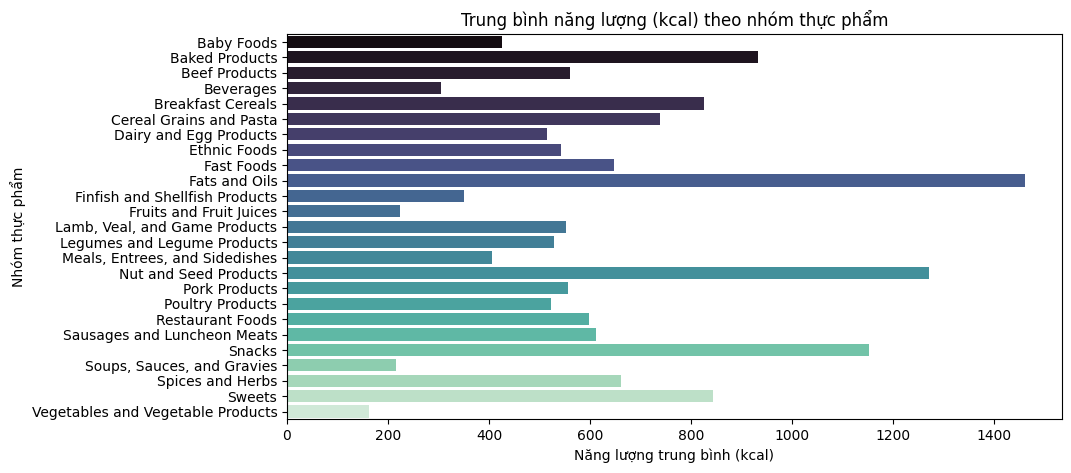

In [ ]:
energy_mean = ndata[ndata['nutrient']=="Energy"].groupby('fgroup')['value'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=energy_mean.values, y=energy_mean.index, palette="mako")
plt.title("Trung bình năng lượng (kcal) theo nhóm thực phẩm")
plt.xlabel("Năng lượng trung bình (kcal)")
plt.ylabel("Nhóm thực phẩm")
plt.savefig("energy_mean.png")
plt.show()

Biểu đồ cho thấy sự phân hóa năng lượng rõ rệt:

* Cao nhất: Nhóm "Fats and Oils" (Chất béo và Dầu) có mức năng lượng cao vượt trội (gần 1500 kcal).

* Cao: Các nhóm như "Nuts" (Các loại hạt), "Snacks", và "Baked Products" (Bánh nướng) cũng có mật độ calo rất cao.

* Thấp nhất: "Vegetable Products" (Rau củ) có năng lượng trung bình thấp nhất (khoảng 100 kcal), phản ánh hàm lượng nước cao.

* Trung bình: Các nhóm giàu protein truyền thống (Thịt, Gia cầm, Sữa, Trứng) tập trung ở mức năng lượng vừa phải (khoảng 550-600 kcal).

#### Loại thực phẩm có hàm lượng protein cao nhất trong nhóm Dairy and Egg Products.

/tmp/ipython-input-2770435000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="food", x="value", data=protein_data, palette="viridis")


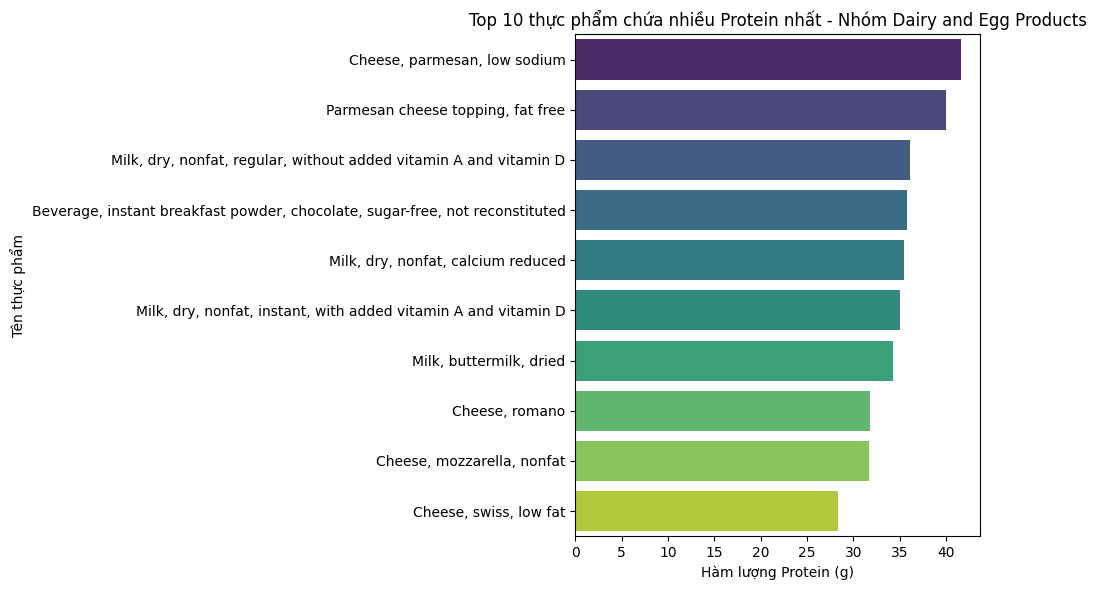

In [ ]:
protein_data = ndata[(ndata["nutrient"] == "Protein") & (ndata["fgroup"] == "Dairy and Egg Products")]
protein_data = protein_data.sort_values("value", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y="food", x="value", data=protein_data, palette="viridis")

plt.title("Top 10 thực phẩm chứa nhiều Protein nhất - Nhóm Dairy and Egg Products")
plt.xlabel("Hàm lượng Protein (g)")
plt.ylabel("Tên thực phẩm")
plt.tight_layout()
plt.savefig("protein_dairy.png")

plt.show()

Biểu đồ cho thấy các sản phẩm có hàm lượng protein cao nhất trong nhóm "Sữa và Trứng" đều là các sản phẩm đã qua xử lý khử nước. Dẫn đầu là phô mai Parmesan và các loại sữa bột không béo, với hàm lượng protein trên 35g. Quá trình loại bỏ nước giúp cô đặc các chất dinh dưỡng, giải thích tại sao chúng có tỷ lệ protein cao vượt trội so với các loại phô mai mềm, chứa nhiều nước hơn.

<Axes: ylabel='fgroup'>

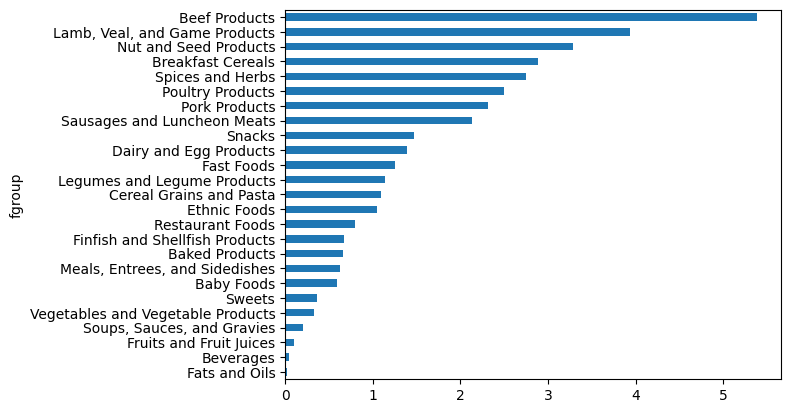

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

Nhận xét:

**Thịt bò** và **hải sản** là hai nhóm sản phẩm có kẽm nhiều nhất

####  Nhóm nào thể hiện sự đa dạng nhất về thành phần dinh dưỡng?


/tmp/ipython-input-1619109395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="fgroup", x="nutrient", data=diversity, palette="crest")


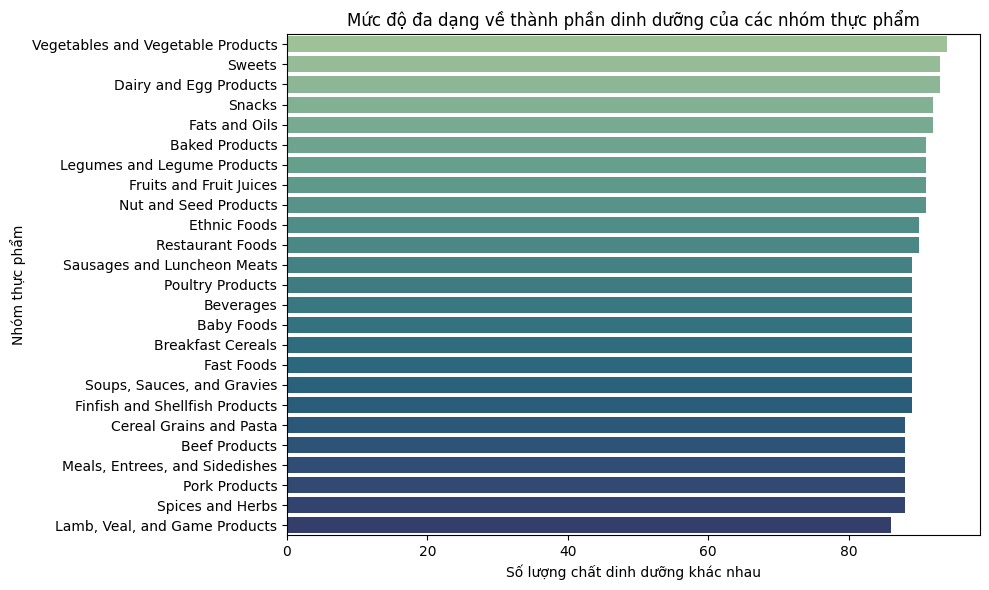

In [ ]:
diversity = ndata.groupby("fgroup")["nutrient"].nunique().reset_index()
diversity = diversity.sort_values("nutrient", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y="fgroup", x="nutrient", data=diversity, palette="crest")

plt.title("Mức độ đa dạng về thành phần dinh dưỡng của các nhóm thực phẩm")
plt.xlabel("Số lượng chất dinh dưỡng khác nhau")
plt.ylabel("Nhóm thực phẩm")
plt.tight_layout()
plt.savefig("diversity_nutrient.png")
plt.show()

Biểu đồ cho thấy hầu hết các nhóm thực phẩm đều có sự đa dạng dinh dưỡng cao.

* Đa dạng nhất: "Rau củ" dẫn đầu, phản ánh đúng vai trò là nguồn cung cấp vi chất dinh dưỡng phong phú.

* Bất ngờ: "Đồ ngọt" và "Sữa" cũng nằm trong top đầu, có thể do các sản phẩm này thường được bổ sung thêm nhiều loại vitamin và khoáng chất.

* Ít đa dạng hơn: Các nhóm thịt nguyên chất như "Thịt cừu, bê" có sự đa dạng thấp hơn, chủ yếu tập trung vào các chất dinh dưỡng đa lượng chính.

### Phân tích so sánh

#### So sánh hàm lượng Protein và Chất béo giữa nhóm "Thịt" và "Sữa"

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách nhóm thịt
meat_groups = [
    "Beef Products",
    "Pork Products",
    "Lamb, Veal, and Game Products",
    "Poultry Products",
    "Sausages and Luncheon Meats"
]

temp = ndata.copy()

# Lọc dữ liệu chỉ chứa 2 nhóm thực phẩm cần so sánh
temp['group_simplified'] = temp['fgroup'].apply(
    lambda x: 'Meat Products' if x in meat_groups
    else ('Dairy and Egg Products' if x == 'Dairy and Egg Products' else 'Other')
)

compare_groups = ["Meat Products", "Dairy and Egg Products"]
subset = temp[temp["group_simplified"].isin(compare_groups)]

# Chỉ lấy hai chất dinh dưỡng: Protein và Fat
subset = subset[subset["nutrient"].isin(["Protein", "Total lipid (fat)"])]

# Tạo Pivot Table để so sánh trung bình
pivot_table = subset.pivot_table(
    index="group_simplified",
    columns="nutrient",
    values="value",
    aggfunc="mean"
).reset_index()

print("Bảng so sánh trung bình Protein và Chất béo:")
pivot_table


Bảng so sánh trung bình Protein và Chất béo:


nutrient,group_simplified,Protein,Total lipid (fat)
0,Dairy and Egg Products,14.216449,10.319346
1,Meat Products,23.089394,12.896555


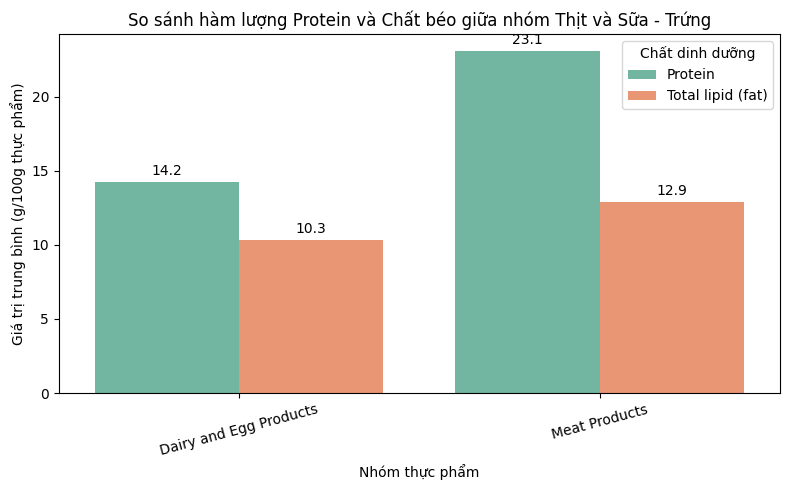

In [25]:
# Vẽ biểu đồ cột so sánh
plt.figure(figsize=(8,5))
pivot_table_melted = pivot_table.melt(id_vars="group_simplified", var_name="Chất dinh dưỡng", value_name="Giá trị trung bình")
ax = sns.barplot(data=pivot_table_melted, x="group_simplified", y="Giá trị trung bình", hue="Chất dinh dưỡng", palette="Set2")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

plt.title("So sánh hàm lượng Protein và Chất béo giữa nhóm Thịt và Sữa - Trứng")
plt.xlabel("Nhóm thực phẩm")
plt.ylabel("Giá trị trung bình (g/100g thực phẩm)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("Compare_Protein_Fat.png")
plt.show()

Biểu đồ cho thấy một sự khác biệt rõ rệt về thành phần dinh dưỡng trung bình giữa hai nhóm thực phẩm.

* Nhóm "Meat Products" (Sản phẩm từ Thịt) có hàm lượng protein trung bình (23.1g) cao vượt trội, cao hơn đáng kể so với nhóm "Dairy and Egg Products" (Sản phẩm từ Sữa và Trứng) (14.2g). Về hàm lượng chất béo (Total lipid), nhóm thịt cũng có giá trị trung bình cao hơn (12.9g so với 10.3g).

* Nhận xét này khẳng định vai trò của thịt là một nguồn cung cấp protein cô đặc hơn so với các sản phẩm từ sữa và trứng trong bộ dữ liệu này. 🥩

#### Khác biệt về Tỷ lệ năng lượng trên Protein giữa nhóm "Ngũ cốc" và "Rau".

In [28]:
import pandas as pd

# Lọc 2 nhóm thực phẩm: Ngũ cốc và Rau
groups = ["Cereal Grains and Pasta", "Vegetables and Vegetable Products"]
subset = ndata[ndata["fgroup"].isin(groups)]

subset = subset[subset["nutrient"].isin(["Protein", "Energy"])]
# Lấy dữ liệu năng lượng và protein
pivot = subset.pivot_table(
                            index="fgroup",
                           columns="nutrient",
                           values="value",
                           aggfunc="mean").reset_index()
# Tính tỷ lệ Energy / Protein
pivot["Energy/Protein"] = pivot["Energy"] / pivot["Protein"]

# Hiển thị kết quả trung bình theo nhóm
ratio_summary = pivot.groupby("fgroup")["Energy/Protein"].mean().reset_index()
ratio_summary

,fgroup,Energy/Protein
0,Cereal Grains and Pasta,81.152381
1,Vegetables and Vegetable Products,57.550603


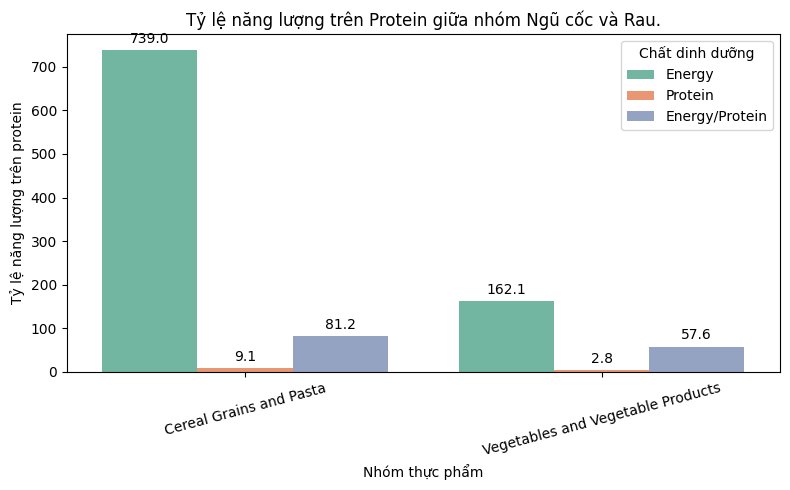

In [31]:
plt.figure(figsize=(8,5))
pivot_table_melted = pivot.melt(id_vars="fgroup", var_name="Chất dinh dưỡng", value_name="Giá trị trung bình")
ax = sns.barplot(data=pivot_table_melted, x="fgroup", y="Giá trị trung bình", hue="Chất dinh dưỡng", palette="Set2")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

plt.title("Tỷ lệ năng lượng trên Protein giữa nhóm Ngũ cốc và Rau.")
plt.xlabel("Nhóm thực phẩm")
plt.ylabel("Tỷ lệ năng lượng trên protein")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("Energy_protein.png")
plt.show()

Nhóm "Cereal Grains and Pasta" (Ngũ cốc) có tỷ lệ Energy/Protein trung bình là 81.15, cao hơn đáng kể so với con số 57.55 của nhóm "Vegetables and Vegetable Products" (Rau củ).

Điều này khẳng định vai trò dinh dưỡng cốt lõi của từng nhóm:

* Ngũ cốc là nguồn cung cấp năng lượng chính trong chế độ ăn, chủ yếu từ carbohydrate. Chúng cung cấp một lượng calo rất lớn so với hàm lượng protein mà chúng có.

* Rau củ, ngược lại, không phải là nguồn năng lượng hiệu quả. Tỷ lệ thấp của chúng cho thấy vai trò chính là cung cấp chất xơ, vitamin và khoáng chất, với lượng calo tương đối thấp so với protein.

### Phân tích tương quan

#### Mối tương quan giữa Năng lượng (Energy) và Chất béo (Fat)

In [39]:
import pandas as pd

pivot_energy_fat = ndata.pivot_table(
    index="food",
    columns="nutrient",
    values="value",
    aggfunc="mean"
).reset_index()

pivot_energy_fat = pivot_energy_fat[["food", "Energy", "Total lipid (fat)"]].dropna()
corr_value = pivot_energy_fat["Energy"].corr(pivot_energy_fat["Total lipid (fat)"])
print("Hệ số tương quan giữa Energy và Fat:", corr_value)


Hệ số tương quan giữa Energy và Fat: 0.767689461226677


Phân tích cho thấy một mối tương quan dương mạnh ($r \approx +0.77$) giữa Năng lượng (Energy) và Chất béo (Total lipid (fat)).
--> chỉ ra một mối quan hệ tuyến tính mạnh mẽ và tích cực giữa hai biến số. Điều này có nghĩa là khi hàm lượng chất béo trong một loại thực phẩm tăng lên, tổng năng lượng của nó cũng có xu hướng tăng theo một cách rất rõ rệt.

#### Nhóm thực phẩm "Năng lượng rỗng" (Năng lượng cao, Protein thấp)

/tmp/ipython-input-2498288414.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Food Group", x="Count", data=empty_by_group, palette="autumn")


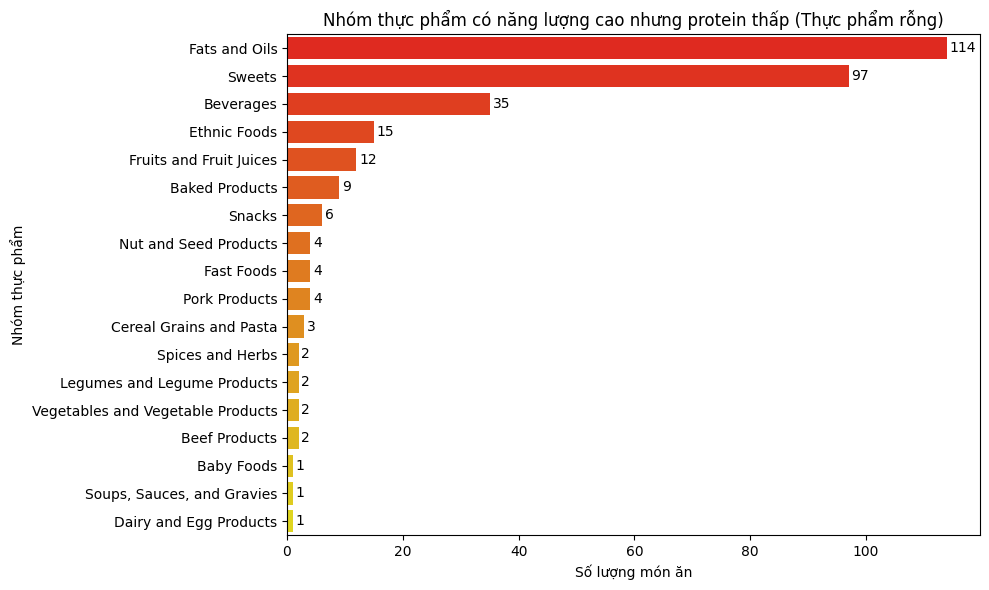

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Xác định ngưỡng phân vị
energy_q3 = ndata[ndata["nutrient"] == "Energy"]["value"].quantile(0.75)
protein_q1 = ndata[ndata["nutrient"] == "Protein"]["value"].quantile(0.25)

# Lọc thực phẩm "rỗng"
energy = ndata[ndata["nutrient"] == "Energy"][["food", "fgroup", "value"]].rename(columns={"value": "Energy"})
protein = ndata[ndata["nutrient"] == "Protein"][["food", "value"]].rename(columns={"value": "Protein"})

merged = pd.merge(energy, protein, on="food", how="inner")

empty_foods = merged[(merged["Energy"] > energy_q3) & (merged["Protein"] < protein_q1)]

# Nhóm theo nhóm thực phẩm và đếm số lượng
empty_by_group = empty_foods["fgroup"].value_counts().reset_index()
empty_by_group.columns = ["Food Group", "Count"]

#Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(y="Food Group", x="Count", data=empty_by_group, palette="autumn")

# Hiển thị giá trị trên từng cột
for index, value in enumerate(empty_by_group["Count"]):
    plt.text(value + 0.5, index, str(value), va='center')

plt.title("Nhóm thực phẩm có năng lượng cao nhưng protein thấp (Thực phẩm rỗng)")
plt.xlabel("Số lượng món ăn")
plt.ylabel("Nhóm thực phẩm")
plt.tight_layout()
plt.savefig("Empty_calorie_foods.png")
plt.show()


* Hai nhóm đứng đầu: "Fats and Oils" (Chất béo và Dầu) và "Sweets" (Đồ ngọt) chiếm vị trí áp đảo, cho thấy chúng là nguồn "calo rỗng" phổ biến nhất.

* Đồ uống có đường: Đáng chú ý, "Beverages" (Đồ uống) đứng thứ ba, chủ yếu do các loại nước giải khát chứa nhiều đường nhưng ít giá trị dinh dưỡng.

* Sự tương phản: Ngược lại, các nhóm thực phẩm giàu dinh dưỡng như "Thịt bò", "Rau củ", và "Sữa" gần như không xuất hiện. Điều này khẳng định vai trò cung cấp dưỡng chất thiết yếu của chúng và sự khác biệt rõ rệt so với thực phẩm đã qua chế biến.

#### Thực phẩm giàu Water có xu hướng ít năng lượng hơn không?

Hệ số tương quan giữa Water và Energy: -0.9115582600633851


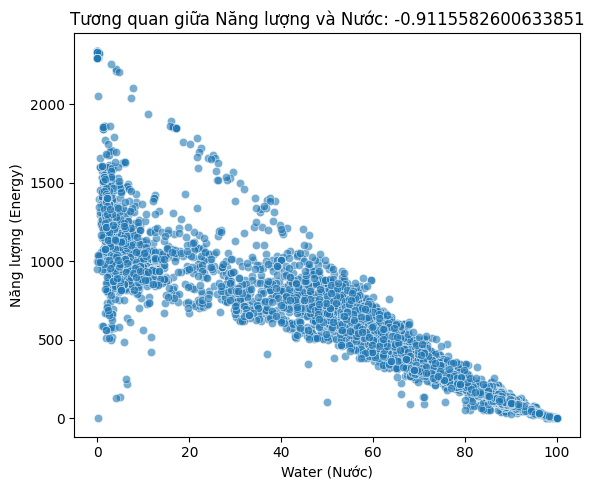

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tạo pivot có Energy và Water
pivot_water_energy = ndata.pivot_table(
    index="food",
    columns="nutrient",
    values="value",
    aggfunc="mean"
).reset_index()

# Tính tương quan giữa Water và Energy
corr_water_energy = pivot_water_energy["Water"].corr(pivot_water_energy["Energy"])
print("Hệ số tương quan giữa Water và Energy:", corr_water_energy)

plt.figure(figsize=(6,5))
sns.scatterplot(x="Water", y="Energy", data=pivot_water_energy, alpha=0.6)
plt.title("Tương quan giữa Năng lượng và Nước: "+ str(corr_water_energy))
plt.xlabel("Water (Nước)")
plt.ylabel("Năng lượng (Energy)")
plt.tight_layout()
plt.savefig("Water_Energy.png")
plt.show()


* Hệ số tương quan âm: -0.911 --> tương quan nghịch rất mạnh.
* Khi hàm lượng nước (trục hoành) tăng lên, hàm lượng năng lượng (trục tung) có xu hướng giảm xuống một cách rõ rệt.


### Phân tích dự đoán

Tìm ra chỉ số thể hiện mức độ cân bằng giữa các chất dinh dưỡng chính:

    Protein – Fat – Carbs – Fiber – Energy

Chỉ số càng cao → nhóm thực phẩm càng cân bằng, có lợi cho sức khỏe.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# B1: Lọc các chất dinh dưỡng chính
main_nutrients = ["Protein", "Total lipid (fat)", "Carbohydrate, by difference", "Fiber, total dietary", "Energy"]
ndata_main = ndata[ndata["nutrient"].isin(main_nutrients)]

# B2: Pivot dữ liệu sang dạng wide (mỗi chất là 1 cột)
pivot_df = ndata_main.pivot_table(index=["food", "fgroup"],
                                  columns="nutrient",
                                  values="value",
                                  aggfunc="mean").reset_index()
pivot_df.head()


nutrient,food,fgroup,"Carbohydrate, by difference",Energy,"Fiber, total dietary",Protein,Total lipid (fat)
0,AMARANTH FLAKES,Breakfast Cereals,71.15,915.0,9.5,15.54,7.00
1,"APPLEBEE'S, 9 oz house sirloin steak",Restaurant Foods,0.00,457.0,NaN,25.63,8.19
2,"APPLEBEE'S, Double Crunch Shrimp",Restaurant Foods,23.92,838.0,1.2,14.18,19.00
3,"APPLEBEE'S, French fries",Restaurant Foods,37.41,735.0,3.3,3.39,13.37
4,"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid...",Restaurant Foods,19.88,427.0,1.4,7.04,6.32


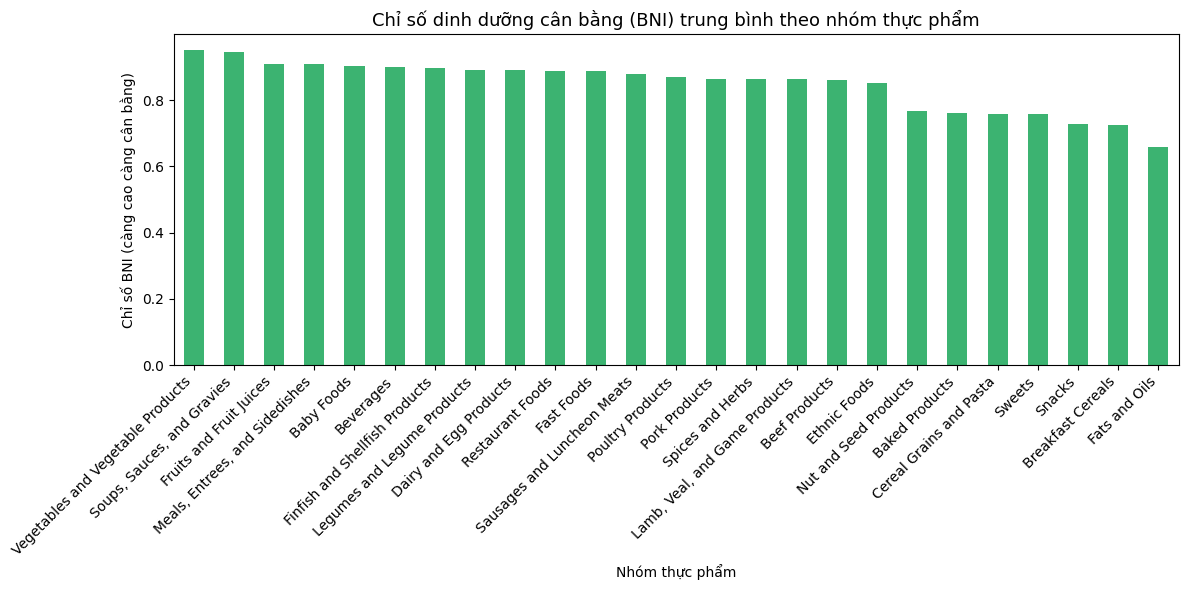

In [64]:
# B3: Chuẩn hóa dữ liệu về [0, 1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(pivot_df[main_nutrients])
pivot_df[main_nutrients] = scaled_features

# B4: Tính chỉ số cân bằng BNI (Balance Nutrition Index)
pivot_df["BNI"] = 1 - pivot_df[main_nutrients].std(axis=1)

# B5: Tính trung bình BNI theo nhóm thực phẩm
group_bni = pivot_df.groupby("fgroup")["BNI"].mean().sort_values(ascending=False)

# B6: Vẽ biểu đồ
plt.figure(figsize=(12,6))
group_bni.plot(kind="bar", color="mediumseagreen")
plt.title("Chỉ số dinh dưỡng cân bằng (BNI) trung bình theo nhóm thực phẩm", fontsize=13)
plt.ylabel("Chỉ số BNI (càng cao càng cân bằng)")
plt.xlabel("Nhóm thực phẩm")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Top10_BNI")
plt.show()


Nhẫn xét
* Nhóm cân bằng nhất: Đứng đầu là "Rau củ" và "Trái cây" vì chúng giàu dinh dưỡng nhưng ít calo. Các "Món ăn hỗn hợp" cũng có chỉ số cao nhờ sự kết hợp đa dạng các thành phần.

* Nhóm mất cân bằng nhất: Đứng cuối bảng là "Chất béo và Dầu", "Đồ ngọt", và "Đồ ăn vặt". Chúng chứa nhiều calo "rỗng" từ đường và chất béo nhưng lại rất nghèo nàn protein và chất xơ.

* Nhóm Protein ở mức tốt: Các loại thịt, cá, sữa, và trứng nằm ở giữa, thể hiện sự cân bằng tốt giữa protein và các dưỡng chất thiết yếu khác.

## Kết luận
* Nghiên cứu này đã thành công trong việc xử lý và chuyển đổi bộ dữ liệu usda_food từ định dạng JSON phức tạp thành một cơ sở dữ liệu có cấu trúc, cho phép thực hiện các phân tích dinh dưỡng sâu sắc.

* Báo cáo đã làm nổi bật các quy luật cơ bản trong thành phần thực phẩm và xác định rõ vai trò của từng nhóm. Phát hiện quan trọng nhất là việc xây dựng thành công Chỉ số Dinh dưỡng Cân bằng (BNI), một công cụ định lượng có giá trị ứng dụng cao.

* Tóm lại, phân tích này chứng tỏ sức mạnh của khoa học dữ liệu trong việc giải mã thông tin phức tạp. Các kết quả và chỉ số BNI có thể được ứng dụng thực tế để hỗ trợ người tiêu dùng đưa ra các lựa chọn thực phẩm thông minh và lành mạnh hơn.

## 5. 2012 Federal Election Commission Database

### Bối cảnh
Trong mỗi kỳ bầu cử tổng thống Hoa Kỳ, Ủy ban Bầu cử Liên bang (Federal Election Commission – FEC) công khai toàn bộ dữ liệu tài trợ cho các chiến dịch tranh cử.
Bộ dữ liệu này ghi lại chi tiết mọi khoản đóng góp, bao gồm:
* Tên người đóng góp

* Nghề nghiệp và nơi làm việc

* Địa chỉ thành phố, tiểu bang

* Số tiền đóng góp
* Ứng viên nhận tài trợ

### Nạp dữ liệu
Dữ liệu được lưu trong file CSV lớn tên là P00000001-ALL.csv (~150MB).

In [65]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Kết quả: Có hơn 1 triệu bản ghi (1001730) — nghĩa là hơn 1 triệu lần quyên góp cá nhân cho các ứng viên trong cuộc bầu cử tổng thống Mỹ năm 2012.

In [ ]:
# Ta thử xem một mẫu cụ thể trong DataFrame
fec.iloc[123456]

,123456
cmte_id,C00431445
cand_id,P80003338
cand_nm,"Obama, Barack"
contbr_nm,"ELLMAN, IRA"
contbr_city,TEMPE
contbr_st,AZ
contbr_zip,852816719
contbr_employer,ARIZONA STATE UNIVERSITY
contbr_occupation,PROFESSOR
contb_receipt_amt,50.0


Nghĩa là:

  * Một giáo sư đại học ở bang ARIZONA đã
đóng góp $50 cho chiến dịch của Tổng thống Barack Obama vào ngày 1/12/2011.

### Xác định danh sách ứng viên

In [ ]:
unique_cands = fec["cand_nm"].unique()
print("Có tổng cộng " + str(len(unique_cands)) +" ứng viên tham gia tranh cử.")
unique_cands

Có tổng cộng 13 ứng viên tham gia tranh cử.


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Có tổng cộng 13 ứng viên trong cuộc đua năm 2012.

In [ ]:
unique_cands[2]

'Obama, Barack'

### Bổ sung thông tin đảng phái
Ta có thể thấy rằng trong tập dữ liệu này không có thông tin đảng phái của các ứng viên tham gia tranh cử.

Ta tạo một dictionary ánh xạ để chỉ định ứng viên thuộc đảng phái nào:
* Democrat : Đảng Dân chủ
* Republican: Đảng Cộng hòa

In [ ]:
parties = {"Bachmann, Michelle": "Republican",
          "Cain, Herman": "Republican",
          "Gingrich, Newt": "Republican",
          "Huntsman, Jon": "Republican",
          "Johnson, Gary Earl": "Republican",
          "McCotter, Thaddeus G": "Republican",
          "Obama, Barack": "Democrat",
          "Paul, Ron": "Republican",
          "Pawlenty, Timothy": "Republican",
          "Perry, Rick": "Republican",
          "Roemer, Charles E. 'Buddy' III": "Republican",
          "Romney, Mitt": "Republican",
          "Santorum, Rick": "Republican"}

Bây giờ, bằng cách sử dụng phép ánh xạ này và phương thức ánh xạ trên các đối tượng Series, ta có thể tính toán một mảng các đảng phái chính trị từ tên ứng cử viên:

In [ ]:
fec["cand_nm"][123456:123465]


,cand_nm
123456,"Obama, Barack"
123457,"Obama, Barack"
123458,"Obama, Barack"
123459,"Obama, Barack"
123460,"Obama, Barack"
123461,"Obama, Barack"
123462,"Obama, Barack"
123463,"Obama, Barack"
123464,"Obama, Barack"


In [ ]:
fec["cand_nm"][123456:123465].map(parties)

,cand_nm
123456,Democrat
123457,Democrat
123458,Democrat
123459,Democrat
123460,Democrat
123461,Democrat
123462,Democrat
123463,Democrat
123464,Democrat


Kết quả cho thấy phiếu bầu từ 123456 đến 123465 đều bầu cho ông **Barack Obama** đến từ **đảng Dân chủ**.

Thêm cột party (Đảng)

In [ ]:
fec["party"] = fec["cand_nm"].map(parties)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

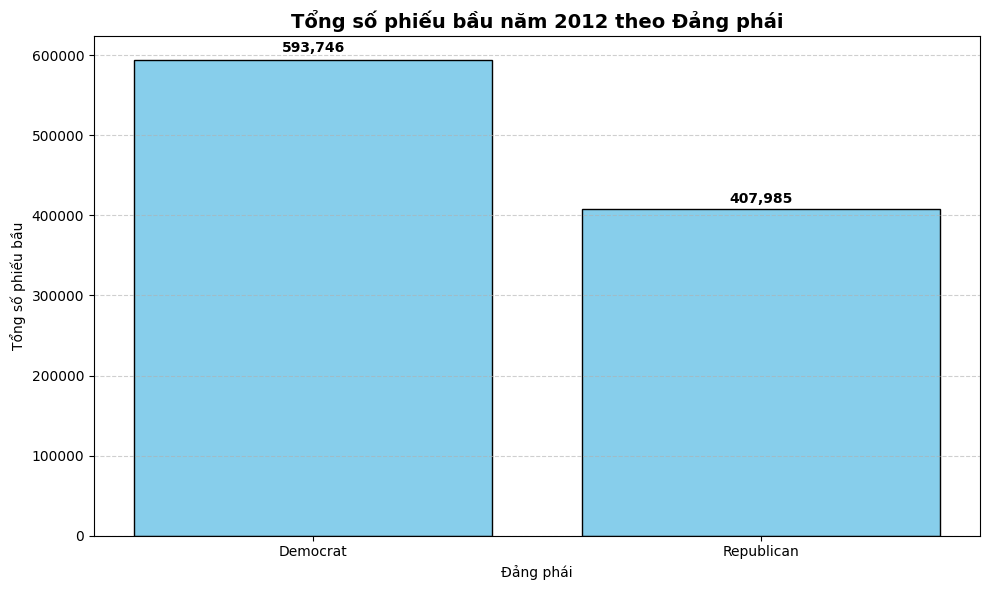

In [ ]:
import matplotlib.pyplot as plt

num_party = fec["party"].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(num_party.index, num_party.values,
               color='skyblue', edgecolor='black')

plt.title('Tổng số phiếu bầu năm 2012 theo Đảng phái', fontsize=14, fontweight='bold')
plt.ylabel('Tổng số phiếu bầu')
plt.xlabel('Đảng phái')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (height * 0.01),
             f'{int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig("num_party.png")
plt.show()


Như vậy, có gần 600.000 đóng góp cho Đảng Dân chủ, và ~400.000 cho Đảng Cộng hòa.



### Làm sạch dữ liệu

In [ ]:
(fec["contb_receipt_amt"] > 0).value_counts()

,count
contb_receipt_amt,
True,991475
False,10256


In [ ]:
fec = fec[fec["contb_receipt_amt"] > 0]

Nhận xét:
* Bộ dữ liệu gồm cả khoản đóng góp và hoàn tiền (refund).

* Lọc lại chỉ lấy các khoản đóng góp dương (> 0) để phân tích

Kết quả: có 991475 bản ghi hợp lệ

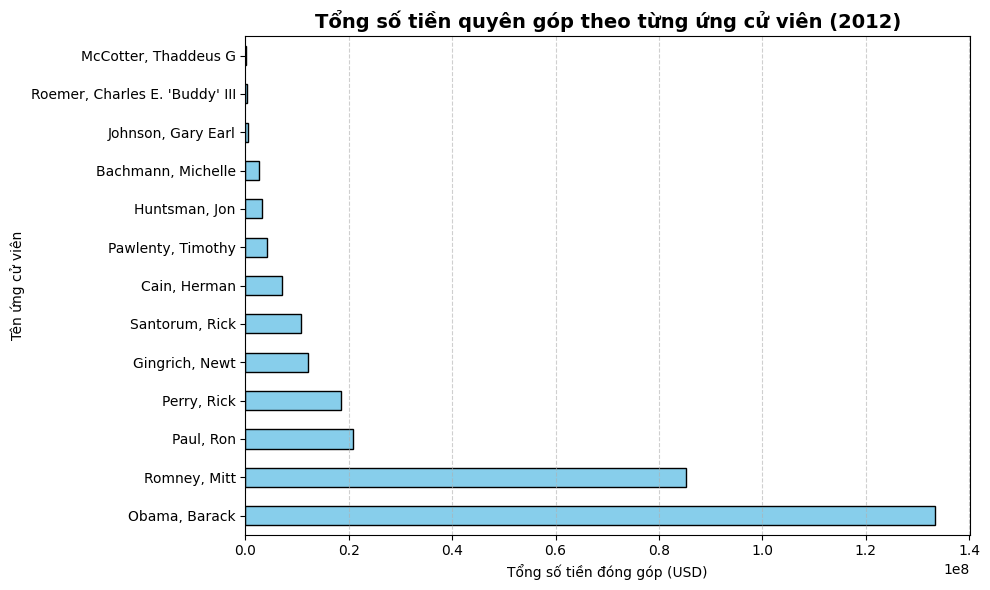

In [ ]:
import matplotlib.pyplot as plt

# Tính tổng đóng góp theo ứng cử viên
by_cand = fec.groupby('cand_nm')['contb_receipt_amt'].sum()
top_candidates = by_cand.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
top_candidates.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Tổng số tiền quyên góp theo từng ứng cử viên (2012)', fontsize=14, fontweight='bold')
plt.xlabel('Tổng số tiền đóng góp (USD)')
plt.ylabel('Tên ứng cử viên')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("total_amount.png")
plt.show()


Kết quả cho thấy **Obama, Barack** và **Romney, Mitt** là 2 ứng cử viên chính trong kì bầu cử 2012.

--> Cho nên ta chỉ lấy dữ liệu quyên góp cho Obama và Romney — hai nhân vật chủ chốt 2012.

In [ ]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700975 entries, 411 to 701385
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            700975 non-null  object 
 1   cand_id            700975 non-null  object 
 2   cand_nm            700975 non-null  object 
 3   contbr_nm          700975 non-null  object 
 4   contbr_city        700968 non-null  object 
 5   contbr_st          700971 non-null  object 
 6   contbr_zip         700922 non-null  object 
 7   contbr_employer    695594 non-null  object 
 8   contbr_occupation  695510 non-null  object 
 9   contb_receipt_amt  700975 non-null  float64
 10  contb_receipt_dt   700975 non-null  object 
 11  receipt_desc       8064 non-null    object 
 12  memo_cd            88534 non-null   object 
 13  memo_text          91980 non-null   object 
 14  form_tp            700975 non-null  object 
 15  file_num           700975 non-null  int64  
 16  party

Dữ liệu hợp lệ còn 694282 dòng.

### Thống kê quyên góp theo nghề nghiệp và nhà tuyển dụng (Donation Statistics by Occupation and Employer)

#### Thống kê số lượng nghề nghiệp

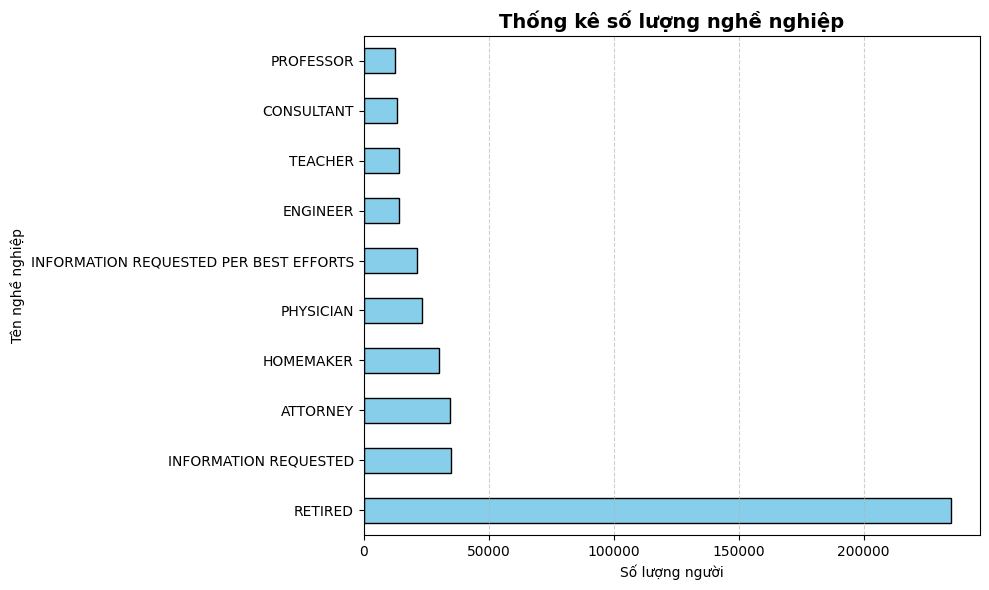

In [ ]:
result = fec["contbr_occupation"].value_counts()[:10]

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
result.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Thống kê số lượng nghề nghiệp', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng người')
plt.ylabel('Tên nghề nghiệp')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("tk1.png")
plt.show()

→ Nghề **“RETIRED”** và **“ATTORNEY”** đóng góp nhiều nhất.

#### Chuẩn hóa dữ liệu nghề nghiệp và nhà tuyển dụng

In [ ]:
# Chuẩn hóa nghề nghiệp
occ_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
"C.E.O.": "CEO"
}

def get_occ(x):
  return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

→ Dữ liệu sạch, giảm sai lệch khi thống kê.

In [ ]:
# Chuẩn hóa nhà tuyển dụng
emp_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"SELF" : "SELF-EMPLOYED",
"SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
  return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

→ Gom các biến thể (“SELF”, “SELF EMPLOYED”) về cùng dạng chuẩn “SELF-EMPLOYED”.

#### Phân tích tổng đóng góp theo nghề & đảng

In [ ]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7343540.33
CEO,2071474.79,3932685.52
CONSULTANT,2459812.71,2472815.27
ENGINEER,950425.55,1780101.88
EXECUTIVE,1355161.05,3918556.85
HOMEMAKER,4243394.30,13241413.35
INVESTOR,884133.00,2320348.92
LAWYER,3159391.87,378590.32
MANAGER,762693.22,1404878.25


Từ kết quả cho thấy các nghề giàu ảnh hưởng gồm: RETIRED, ATTORNEY, HOMEMAKER.

<Axes: xlabel='contbr_occupation'>

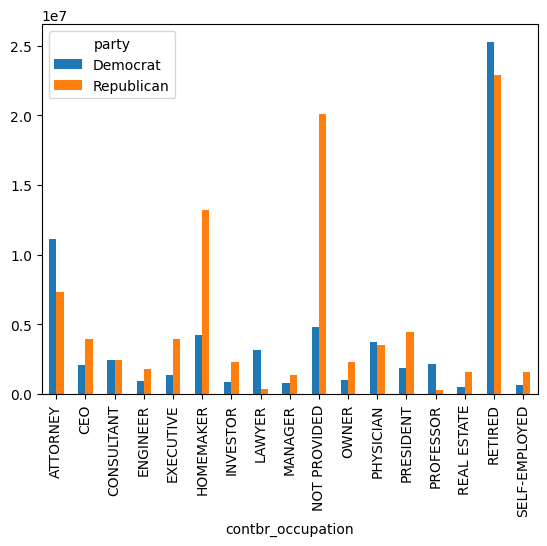

In [ ]:
over_2mm.plot(kind="bar")

Biểu đồ giúp so sánh rõ hơn giữa Democrat vs Republican.

#### Top nghề nghiệp và công ty quyên góp cho từng ứng cử viên

/tmp/ipython-input-3788850752.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_occ = grouped.apply(get_top_amounts, "contbr_occupation", n=7).reset_index()


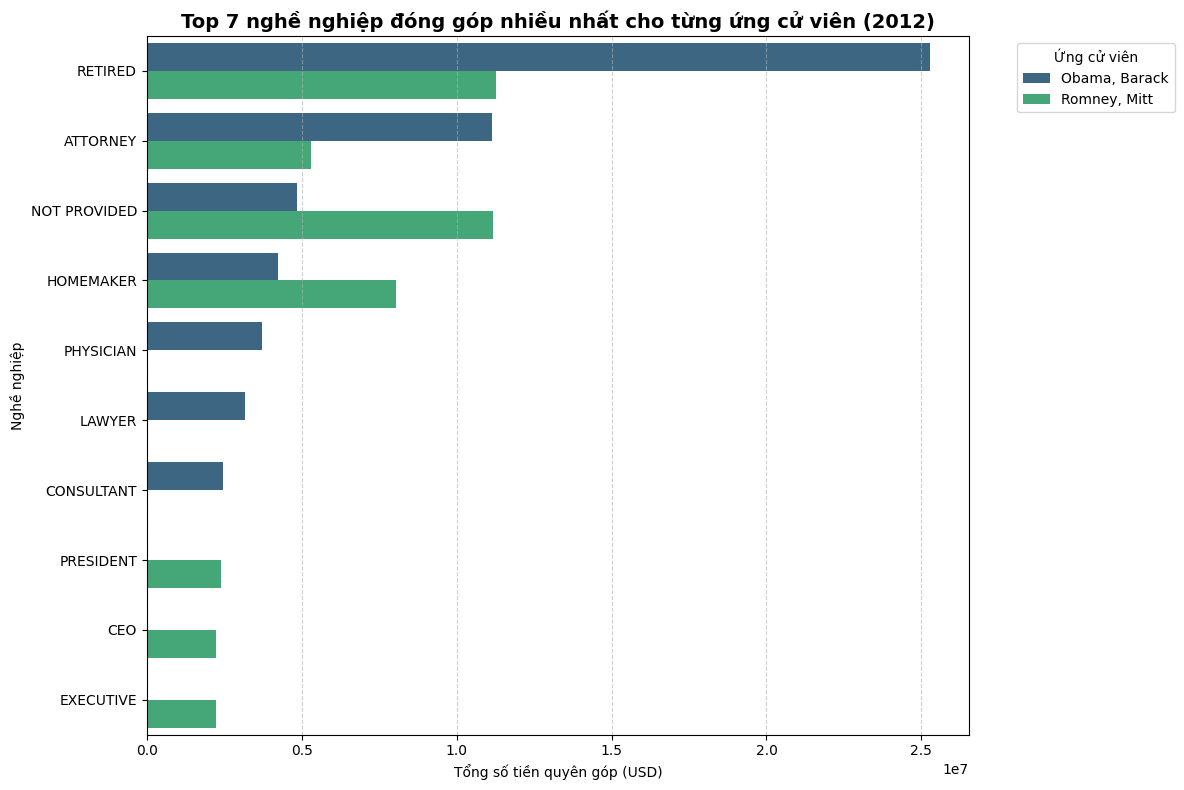

In [ ]:
def get_top_amounts(group, key, n=5):
  totals = group.groupby(key)["contb_receipt_amt"].sum()
  return totals.nlargest(n)
grouped = fec_mrbo.groupby("cand_nm")
top_occ = grouped.apply(get_top_amounts, "contbr_occupation", n=7).reset_index()

# Đổi tên cột cho dễ hiểu
top_occ.columns = ["Candidate", "Occupation", "Total_Amount"]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_occ,
    y="Occupation",
    x="Total_Amount",
    hue="Candidate",
    dodge=True,
    palette="viridis"
)

plt.title("Top 7 nghề nghiệp đóng góp nhiều nhất cho từng ứng cử viên (2012)", fontsize=14, fontweight="bold")
plt.xlabel("Tổng số tiền quyên góp (USD)")
plt.ylabel("Nghề nghiệp")
plt.legend(title="Ứng cử viên", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("tk2.png")
plt.show()

In [ ]:
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

/tmp/ipython-input-3439678550.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             11126932.97
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               LAWYER                3159391.87
               CONSULTANT            2459812.71
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5302578.82
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

/tmp/ipython-input-973899934.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_employers = grouped.apply(get_top_amounts, "contbr_employer", n=7).reset_index()


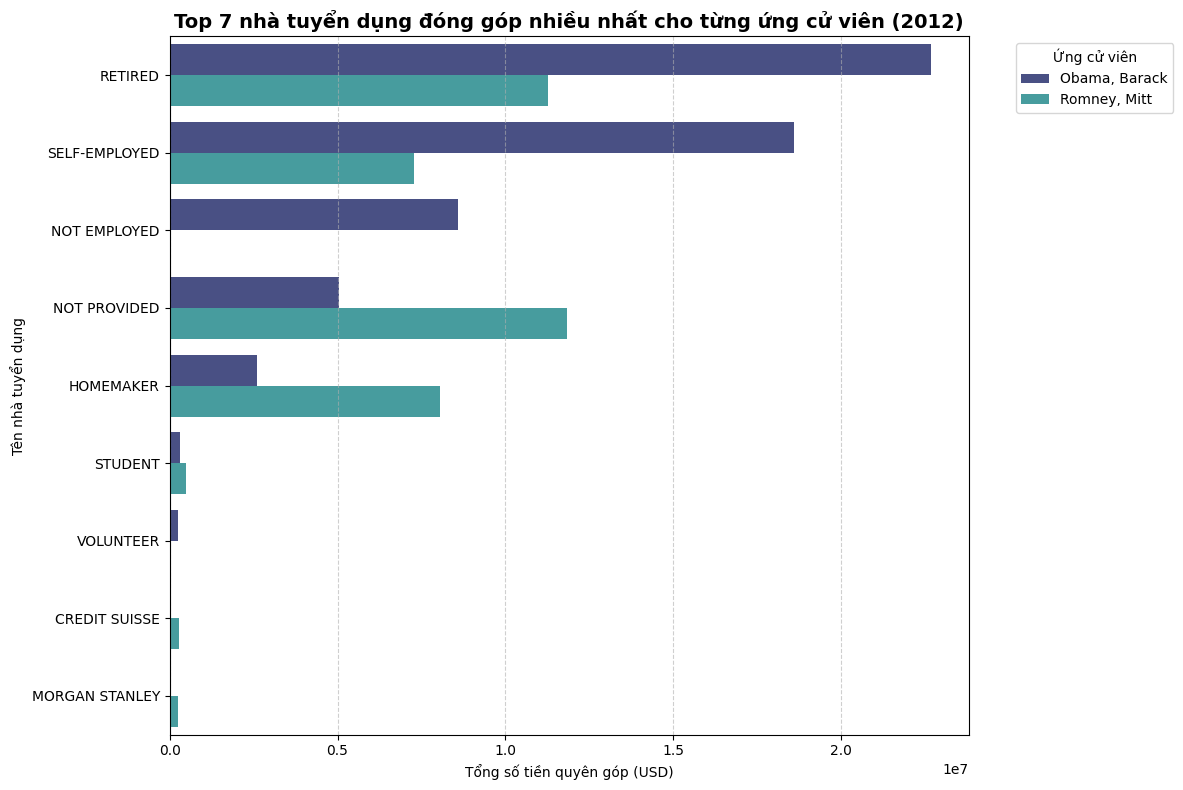

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_amounts(group, key, n=7):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

grouped = fec_mrbo.groupby("cand_nm")

top_employers = grouped.apply(get_top_amounts, "contbr_employer", n=7).reset_index()

top_employers.columns = ["Candidate", "Employer", "Total_Amount"]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_employers,
    y="Employer",
    x="Total_Amount",
    hue="Candidate",
    dodge=True,
    palette="mako"
)

plt.title("Top 7 nhà tuyển dụng đóng góp nhiều nhất cho từng ứng cử viên (2012)", fontsize=14, fontweight="bold")
plt.xlabel("Tổng số tiền quyên góp (USD)")
plt.ylabel("Tên nhà tuyển dụng")
plt.legend(title="Ứng cử viên", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("tk4.png")
plt.show()


In [ ]:
grouped.apply(get_top_amounts, "contbr_employer", n=7)

/tmp/ipython-input-2006603070.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=7)


cand_nm        contbr_employer
Obama, Barack  RETIRED            22665902.20
               SELF-EMPLOYED      18584277.16
               NOT EMPLOYED        8584118.70
               NOT PROVIDED        5036178.37
               HOMEMAKER           2599987.04
               STUDENT              318831.45
               VOLUNTEER            257104.00
Romney, Mitt   NOT PROVIDED       11827237.12
               RETIRED            11264701.35
               HOMEMAKER           8037000.86
               SELF-EMPLOYED       7265136.53
               STUDENT              488642.82
               CREDIT SUISSE        265650.00
               MORGAN STANLEY       262266.00
Name: contb_receipt_amt, dtype: float64

| **Ứng cử viên** | **Top nghề nghiệp quyên góp**                  | **Top nhà tuyển dụng**                               |
|------------------|------------------------------------------------|------------------------------------------------------|
| **Obama**        | RETIRED, ATTORNEY, PHYSICIAN, LAWYER          | RETIRED, SELF-EMPLOYED, MICROSOFT                    |
| **Romney**       | HOMEMAKER, EXECUTIVE, CEO                      | MORGAN STANLEY, GOLDMAN SACHS, BARCLAYS CAPITAL      |


### Phân tích số tiền quyên góp (Bucketing Donation Amounts)

Sử dụng hàm cắt để phân chia số tiền đóng góp thành các nhóm theo quy mô đóng góp

In [ ]:
import numpy as np
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

,contb_receipt_amt
411,"(10, 100]"
412,"(100, 1000]"
413,"(100, 1000]"
414,"(10, 100]"
415,"(10, 100]"
...,...
701381,"(10, 100]"
701382,"(100, 1000]"
701383,"(1, 10]"
701384,"(10, 100]"


Phân bố số lượng đóng góp

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

/tmp/ipython-input-3276222007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


Nhận xét:
* Obama nhận nhiều khoản nhỏ (≤ $100) hơn hẳn Romney.

* Romney có tỷ lệ đóng góp lớn (≥ $1000) cao hơn.

Chuẩn hóa tỷ lệ đóng góp theo quy mô

In [ ]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


Bây giờ ta sẽ trực quan nó bằng biểu đồ cột.

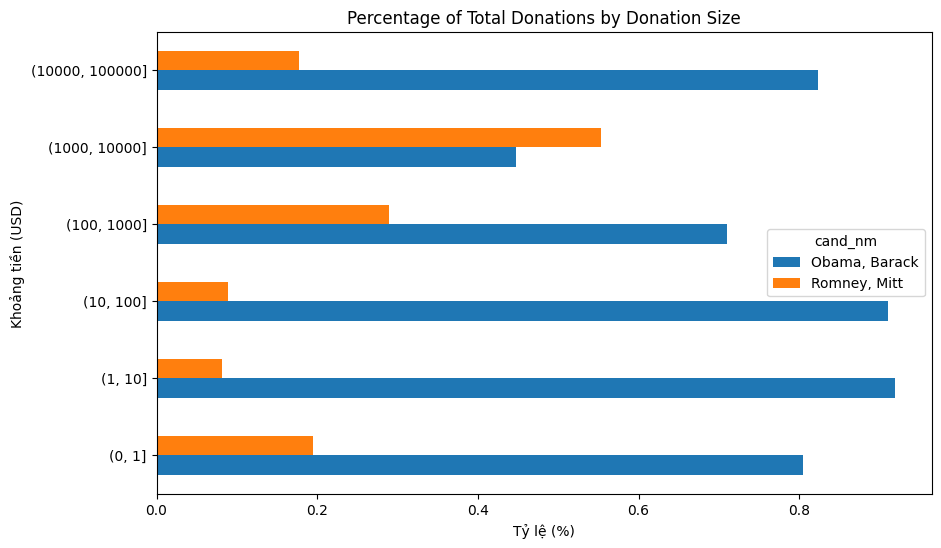

In [ ]:
import matplotlib.pyplot as plt

normed_sums[:-2].plot(kind="barh", figsize=(10,6))
plt.title("Percentage of Total Donations by Donation Size")
plt.xlabel("Tỷ lệ (%)")
plt.ylabel("Khoảng tiền (USD)")
plt.show()


* Obama thống trị hoàn toàn ở các nhóm quyên góp nhỏ, thể hiện chiến dịch huy động quần chúng mạnh mẽ.

* Romney lại nổi bật trong các khoản lớn, gợi ý mạng lưới ủng hộ viên giàu có hoặc doanh nghiệp.

### Thống kê quyên góp theo bang (Donation Statistics by State)

Tổng hợp dữ liệu theo ứng viên và tiểu bang

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DC,4317865.85,999740.50
DE,325394.14,81404.00


Tính tỷ lệ phần trăm quyên góp theo bang

In [ ]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.761575,0.238425
AL,0.515802,0.484198
AR,0.755084,0.244916
AZ,0.445087,0.554913
CA,0.681780,0.318220
CO,0.587476,0.412524
CT,0.376242,0.623758
DC,0.811994,0.188006
DE,0.799891,0.200109


Nhận xét:

* Obama nhận được đa số quyên góp ở các bang đông dân và có xu hướng nghiêng về Đảng Dân chủ như
🇨🇦 California, 🇩🇪 Delaware, 🇩🇨 Washington D.C.

* Romney mạnh hơn ở các bang bảo thủ, ví dụ như 🇦🇿 Arizona, 🇫🇱 Florida, 🇨🇹 Connecticut.

* Một số bang như 🇦🇱 Alabama có tỷ lệ gần cân bằng giữa hai bên.

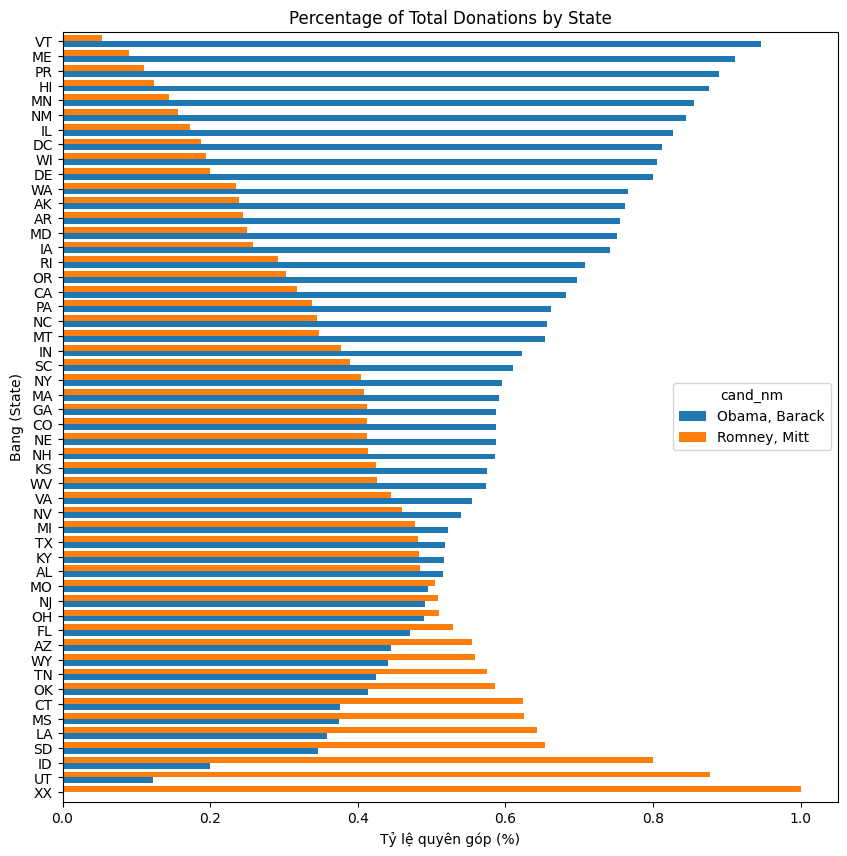

In [ ]:
import matplotlib.pyplot as plt

percent.sort_values(by="Obama, Barack", ascending=True).plot(
    kind="barh", figsize=(10, 10), width=0.8
)
plt.title("Percentage of Total Donations by State")
plt.xlabel("Tỷ lệ quyên góp (%)")
plt.ylabel("Bang (State)")
plt.savefig("tk5.png")
plt.show()


Hình biểu đồ giúp dễ dàng thấy được:

* Bang nào ủng hộ Obama mạnh hơn (màu xanh).

* Bang nào có xu hướng ủng hộ Romney (màu cam).

## 6. Coclusion